In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [58]:
print(raw_df.keys())
print(raw_df.shape)
print(raw_df.describe())
X = data
y = target

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(1012, 11)
                0            1            2           3           4   \
count  1012.000000  1012.000000  1012.000000  506.000000  506.000000   
mean    180.143778    12.008350    16.834792    0.069170    0.554695   
std     188.132839    17.250728     9.912616    0.253994    0.115878   
min       0.006320     0.000000     0.460000    0.000000    0.385000   
25%       0.257830     0.000000     8.375000    0.000000    0.449000   
50%      24.021000     7.240000    18.100000    0.000000    0.538000   
75%     391.435000    16.780000    21.890000    0.000000    0.624000   
max     396.900000   100.000000    50.000000    1.000000    0.871000   

               5           6           7           8           9           10  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  
std      0.702617   28.148861    2.105

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [60]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [61]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

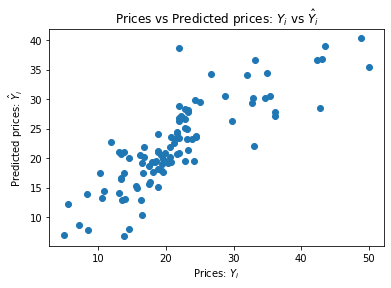

In [62]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [63]:
mean_squared_error(y_test, Y_pred)

23.812245465080732

In [64]:
scaler = StandardScaler()

In [65]:
polynomial_features= PolynomialFeatures(degree=2)

In [66]:
X2 = polynomial_features.fit_transform(X, y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=15)

In [68]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

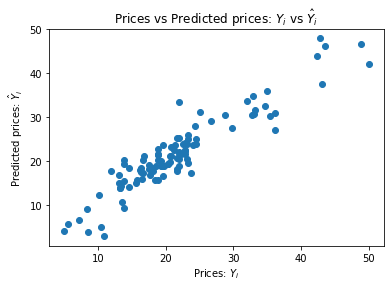

In [69]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [70]:
mean_squared_error(y_test, Y_pred)

10.418718229955315

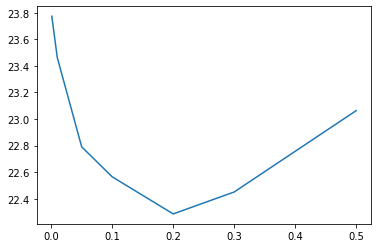

In [71]:
alpha = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
score = []

for i in alpha:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
  regr = linear_model.Lasso(alpha=i)
  regr.fit(X_train, y_train)
  Y_pred = regr.predict(X_test)
  score.append(mean_squared_error(y_test, Y_pred))

plt.plot(alpha, score)  

# alpha = 0.2 is the best 


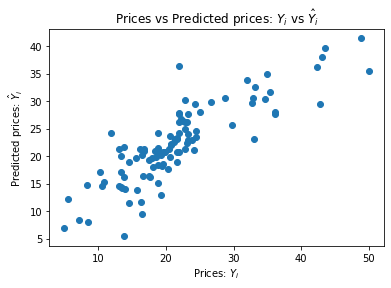

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
regr = linear_model.Lasso(alpha=0.2)
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
score.append(mean_squared_error(y_test, Y_pred))

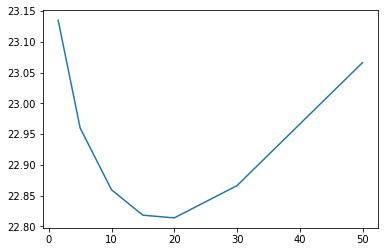

In [73]:
alpha = [ 1.5, 5, 10, 15, 20, 30, 50]
score = []

for i in alpha:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
  regr = linear_model.Ridge(alpha=i)
  regr.fit(X_train, y_train)
  Y_pred = regr.predict(X_test)
  score.append(mean_squared_error(y_test, Y_pred))

plt.plot(alpha, score)  

#najmniejszy blad dla alpha = 20

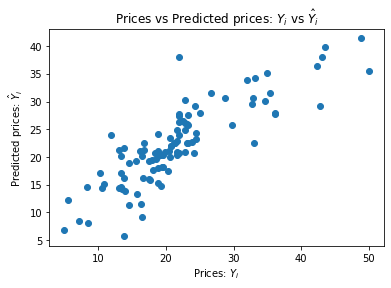

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
regr = linear_model.Ridge(alpha=20)
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
score.append(mean_squared_error(y_test, Y_pred))

In [75]:
# Cwiczenie ze zbiorem A
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


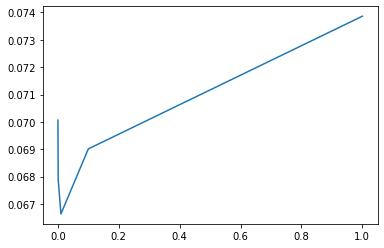

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = LogisticRegression(penalty = 'l2', max_iter=150, C=1)
regr.fit(X_train, y_train)

alpha = [0.0001, 0.001, 0.01, 0.1, 1]
score = []

for i in alpha:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
  regr = linear_model.Ridge(alpha=i)
  regr.fit(X_train, y_train)
  Y_pred = regr.predict(X_test)
  score.append(mean_squared_error(y_test, Y_pred))

plt.plot(alpha, score)  
plt.show()